<div class="alert alert-block alert-success">
    <h1 align="center">Telecom Customer Churn Modelling</h1>
    <h4 align="center" >Alireza Esmaeilpour</h4>
    <h6 align="center"><a href="https://alireza-esp.ir/">Website</a></h6>
    <h6 align="center"><a href="https://github.com/Alireza-Esp">Github</a></h6>
    <h6 align="center"><a href="https://www.kaggle.com/alirezaesmaeilpour">Kaggle</a></h6>
</div>

# 🔵 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

# 🔵 Load the data

In [12]:
data = pd.read_csv("https://github.com/Alireza-Esp/Telecom-Customer-Churn-Modelling/raw/refs/heads/main/data/telecom-customer-churn-v2.csv")

In [13]:
data

,City,Latitude,Longitude,Gender,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Unlimited Data,...,Total Extra Data Charges,Total Revenue,Total Refunds,Tenure Months,CLTV,Satisfaction Score,Customer Status,Churn Label,Churn Category,Churn Reason
0,Los Angeles,33.964131,-118.272783,Male,No,No,Yes,No,DSL,Yes,...,0,129.09,0.00,2,3239,1,Churned,Yes,Competitor,Competitor made better offer
1,Los Angeles,34.059281,-118.307420,Female,No,Yes,Yes,No,Fiber optic,Yes,...,0,169.89,0.00,2,2701,2,Churned,Yes,Other,Moved
2,Los Angeles,34.048013,-118.293953,Female,No,Yes,Yes,Yes,Fiber optic,Yes,...,0,917.70,0.00,8,5372,3,Churned,Yes,Other,Moved
3,Los Angeles,34.062125,-118.315709,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,...,0,3182.97,0.00,28,5003,3,Churned,Yes,Other,Moved
4,Los Angeles,34.039224,-118.266293,Male,No,Yes,Yes,Yes,Fiber optic,Yes,...,0,7208.47,0.00,49,5340,1,Churned,Yes,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,34.341737,-116.539416,Female,No,No,Yes,No,No,No,...,0,3039.53,19.31,72,5306,5,Stayed,No,NaN,NaN
7028,Adelanto,34.667815,-117.536183,Male,Yes,Yes,Yes,Yes,DSL,Yes,...,0,2807.47,48.23,24,2140,3,Stayed,No,NaN,NaN
7029,Amboy,34.559882,-115.637164,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,...,0,9453.04,45.38,72,5560,4,Stayed,No,NaN,NaN
7030,Angelus Oaks,34.167800,-116.864330,Female,Yes,Yes,No,No phone service,DSL,Yes,...,0,319.21,27.24,11,2793,4,Stayed,No,NaN,NaN


# 🔵 Preprocessing

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7032 non-null   object 
 1   Latitude                           7032 non-null   float64
 2   Longitude                          7032 non-null   float64
 3   Gender                             7032 non-null   object 
 4   Partner                            7032 non-null   object 
 5   Dependents                         7032 non-null   object 
 6   Phone Service                      7032 non-null   object 
 7   Multiple Lines                     7032 non-null   object 
 8   Internet Service                   7032 non-null   object 
 9   Unlimited Data                     7032 non-null   object 
 10  Online Security                    7032 non-null   object 
 11  Online Backup                      7032 non-null   objec

🟣 Remove unhelpful features...

* "Offer" column has a lot of NULL values. it's better to drop it...

In [15]:
data.drop(columns=["Offer"], inplace=True)

* Our dataset has a column named "Number of Referrals". It naturally indicates that does a custemr referred a friend or no.
  so the "Referred a Friend" column can be deleted...

In [16]:
data.drop(columns=["Referred a Friend"], inplace=True)

* the "CLTV" column should to be removed. cause it determined by the company...

In [17]:
data.drop(columns=["CLTV"], inplace=True)

* the "Satisfaction Score" column is strongly correlated with "Churn Label" column that is our target feature;
  and naturally should to be deleted.

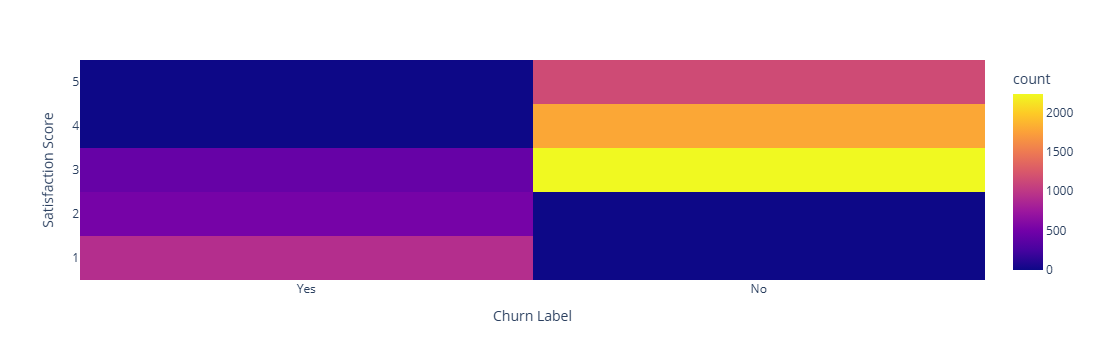

In [18]:
corr = data[["Satisfaction Score", "Churn Label"]]
corr["Churn Label"] = corr["Churn Label"].astype(bool)
corr["Churn Label"] = corr["Churn Label"].astype(int)
corr = corr.corr()
plot = px.density_heatmap(data_frame=data, y="Satisfaction Score", x="Churn Label", width=400)
plot.show()

In [19]:
data.drop(columns=["Satisfaction Score"], inplace=True)

* the "Customer Status", "Churn Category" and "Churn Reason" columns are not important for our target; they should to be deleted.

In [21]:
data.drop(columns=["Customer Status", "Churn Category", "Churn Reason"], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7032 non-null   object 
 1   Latitude                           7032 non-null   float64
 2   Longitude                          7032 non-null   float64
 3   Gender                             7032 non-null   object 
 4   Partner                            7032 non-null   object 
 5   Dependents                         7032 non-null   object 
 6   Phone Service                      7032 non-null   object 
 7   Multiple Lines                     7032 non-null   object 
 8   Internet Service                   7032 non-null   object 
 9   Unlimited Data                     7032 non-null   object 
 10  Online Security                    7032 non-null   object 
 11  Online Backup                      7032 non-null   objec

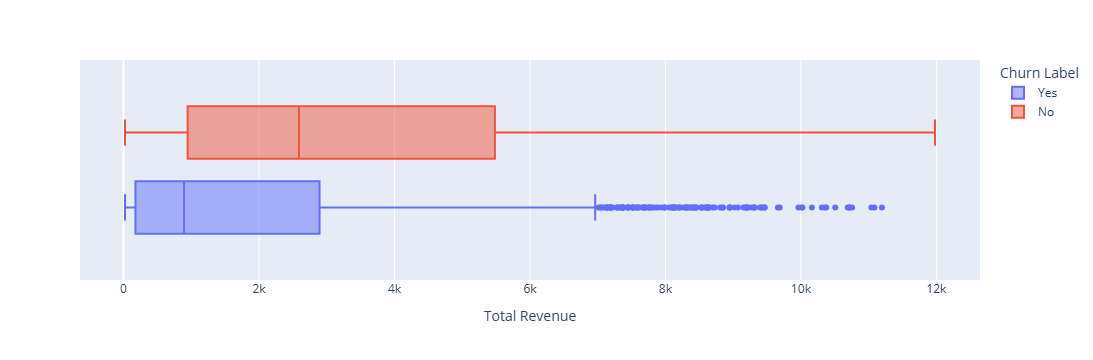

In [32]:
plot = px.box(data_frame=data, x="Total Revenue", color="Churn Label", )
plot.show()